In [7]:
import sys
import cv2
import os
import subprocess
import scipy.io.wavfile
import math
########## PARAMETERS ##########
BUFFER_SIZE = 60
WIDTH = 1280
HEIGHT = 720
########## PARAMETERS ##########

In [81]:
def extractVideo(video_path, video_name, output_path):
    video_counter = 0
    frame_counter = 0
    whole_frame_counter = 0
    cap = cv2.VideoCapture(video_path)
    ret,frame = cap.read()
    HEIGHT = frame.shape[0]
    WIDTH = frame.shape[1]
    video_name = video_name[:-4]
    output_path = output_path + video_name + "vid"
    print("W: ",WIDTH)
    print("H: ",HEIGHT)
#     output_path = output_path + "vid"
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path+ str(video_counter) + '.mp4',fourcc, 20.0, (WIDTH,HEIGHT))
#             output = cv2.VideoWriter(output_path + str(video_counter) + '.mp4',fourcc, 20.0, (WIDTH,HEIGHT))
    while(True):
        if(frame_counter != 0):
            ret, frame = cap.read()
        if (ret == True):
            out.write(frame)
            frame_counter += 1
            whole_frame_counter += 1
        else: 
            print("end")
            break
        if (frame_counter == BUFFER_SIZE): 
            print(video_counter,':',frame_counter)
            video_counter += 1
            frame_counter = 0
            out = cv2.VideoWriter(output_path + str(video_counter) + '.mp4',fourcc, 20.0, (WIDTH,HEIGHT))
    if(video_counter != BUFFER_SIZE):
        print('deleting: ', output_path + str(video_counter) + '.mp4')
        if os.path.exists(output_path + str(video_counter) + '.mp4'):
            os.remove(output_path + str(video_counter) + '.mp4')
    cap.release()
    print("done extracting video: ", video_path)
    print("total amount of frames: ", whole_frame_counter)
extractVideo('GOPR0248.MP4','GOPR0248.MP4','')

W:  1920
H:  1080
0 : 60
1 : 60
2 : 60
end
deleting:  GOPR0248vid3.mp4
done extracting video:  GOPR0248.MP4
total amount of frames:  223


In [21]:
def extractAudio(video_path, video_name, output_path):
    video_name = video_name[:-4]
    output_path = video_path + video_name
    command = "ffmpeg -i " + video_path + video_name + " -ab 160k -ac 2 -ar 44100 -vn " + output_path + "aud_tmp" + ".wav"
    audio_counter = 0
    

In [49]:
# command = "ffmpeg -i GOPR0240.MP4 -r 30 output.wav"
command = "ffmpeg -i GOPR0246.MP4 -ab 160k -ac 2 -ar 30 output10.wav"
subprocess.call(command, shell=True)
rate, data = scipy.io.wavfile.read('output10.wav')
print (rate)
print (data.shape)

30
(313, 2)


In [58]:
# Load the required libraries:
#   * scipy
#   * numpy
#   * matplotlib
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
def plott(file):
    samplerate, data = wavfile.read(file)
    times = np.arange(len(data))/float(samplerate)
    # Make the plot
    # You can tweak the figsize (width, height) in inches
    plt.figure(figsize=(30, 4))
    plt.fill_between(times, data[:,0], data[:,1], color='k') 
    plt.xlim(times[0], times[-1])
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    # You can set the format by changing the extension
    # like .pdf, .svg, .eps
    plt.savefig('plot.png', dpi=100)
    plt.show()

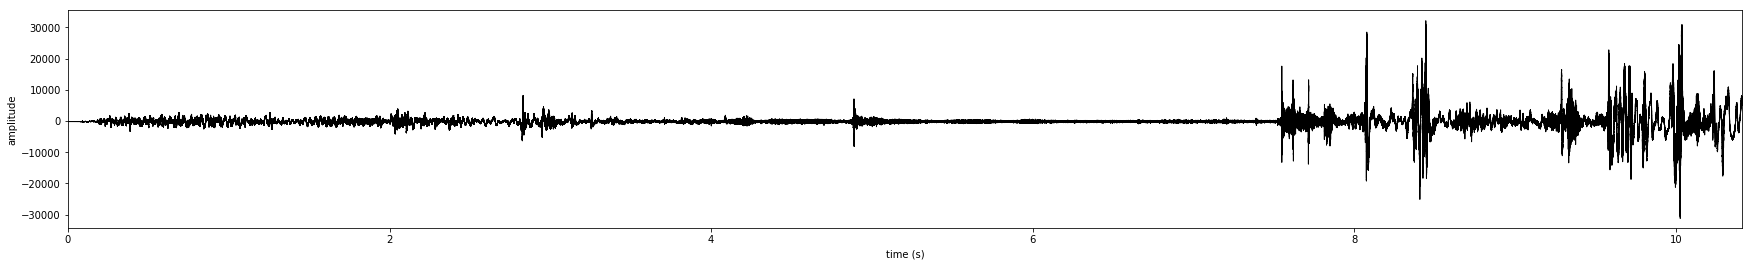

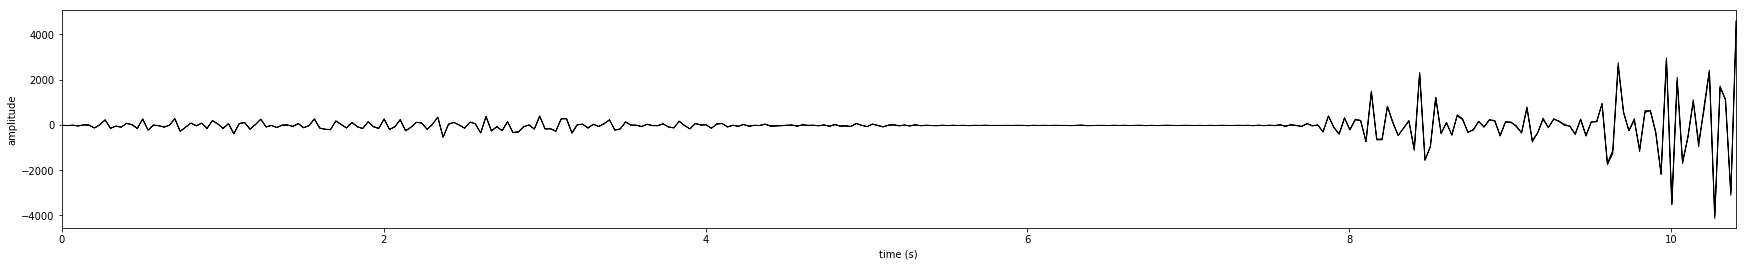

In [59]:
plott("output9.wav")
plott("output10.wav")

In [6]:
def main():
    input_folder_path = input("Enter input folder name: ")
    input_folder_path =  input_folder_path + "/"
    output_folder_path = input("Enter output folder name")
    output_folder_path = output_folder_path + "/"
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
    video_names = os.listdir(input_folder_path)
    video_paths = [input_folder_path + video_name for video_name in video_names]
    for i in range (len(video_paths)):
#         extractVideo(video_paths[i], video_names[i], output_folder_path)
        extractVideo(video_paths[i], video_names[i], output_folder_path)
        extractAudio(video_paths[i], video_names[i], output_folder_path)
    